# Lab 2: Probability, Distributions, and Statistical Questions

### Problem 1
The background is precisely a poisson distribution, therefore to detect a cosmic ray we have to determine what the likelihood is that the background gave a signal as signal like or more. For the average cosmic ray background I chose X = 3 and for the average number of gamma rays emitted per day Y = 6

A) *Show how the probability distribution of the background changes as you integrate (sum) for more days.*
- The probability distribution of the background is given by a poisson distribution with mean 3. To show how the background changes over the course of a few days, the poisson distribution for one day is convolved an equal number of times to the number of days. 

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats

plt.rcParams["figure.figsize"] = (25,10)

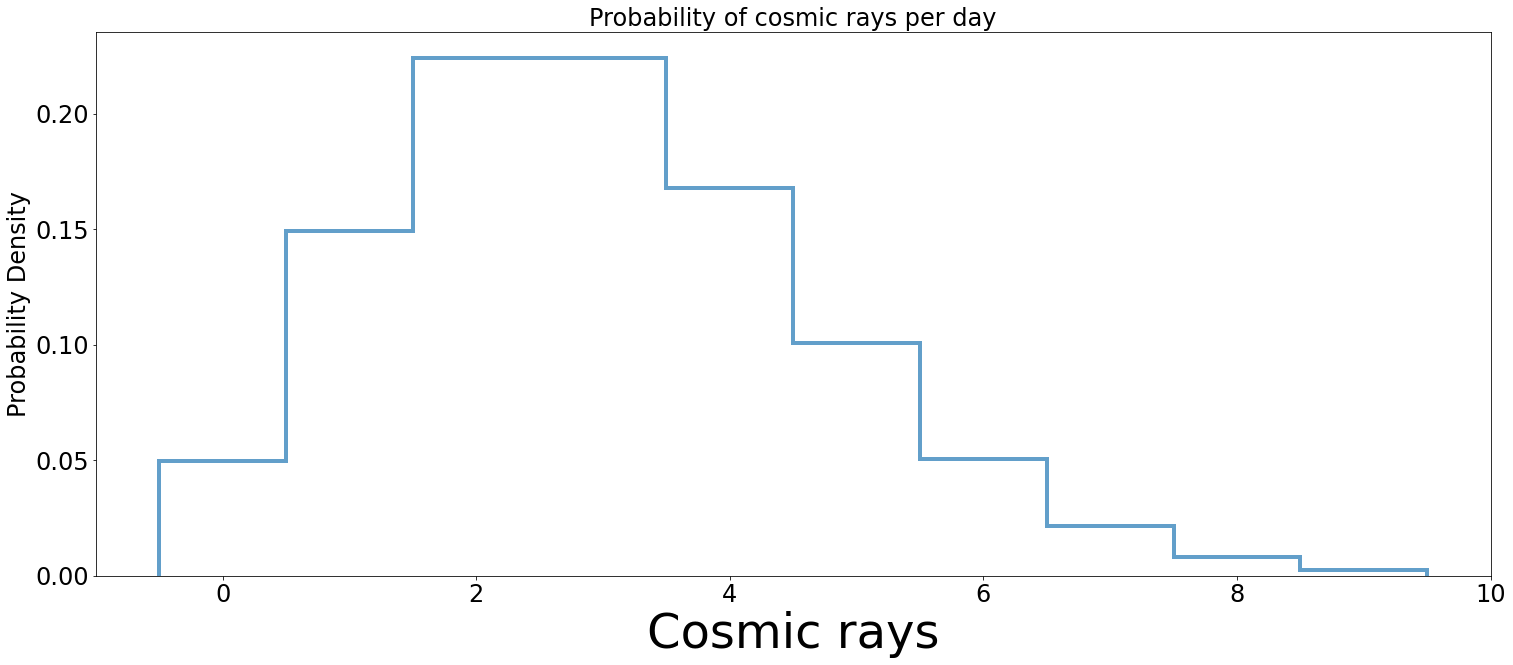

In [2]:
plt.rcParams["figure.figsize"] = (25,10)
fig, ax = plt.subplots(1, 1)
ax.tick_params(labelsize = 24)


mu = 3
    
x = np.arange(stats.poisson.ppf(0.001, mu),
              stats.poisson.ppf(0.999, mu))
edges = np.arange(x[0]-0.5, x[-1]+1.5, 1)
ax.stairs(stats.poisson.pmf(x, mu), edges, linewidth = 4, alpha = 0.7)

plt.xlabel("Cosmic rays", fontsize = 48)
plt.ylabel("Probability Density", fontsize = 24);
plt.title("Probability of cosmic rays per day", fontsize = 24);

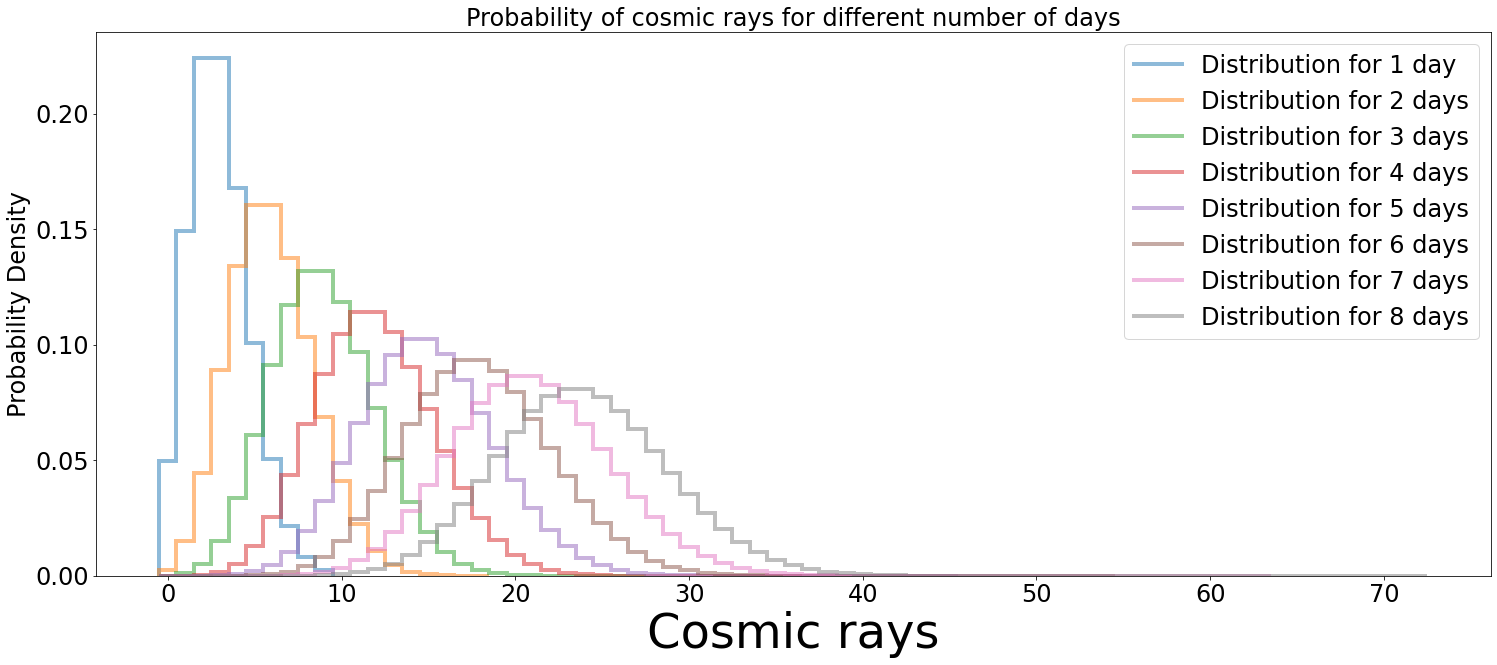

In [3]:
plt.rcParams["figure.figsize"] = (25,10)
fig, ax = plt.subplots(1, 1)
ax.tick_params(labelsize = 24)

poisson_dist = stats.poisson.pmf(x, mu)
conv2 = stats.poisson.pmf(x, mu)
x2 = np.arange(-0.5, len(conv2)+0.5)
ax.stairs(conv2, x2, linewidth = 4, alpha = 0.5, label = "Distribution for 1 day")


for i in range(7):

    conv2 = np.convolve(conv2, poisson_dist)

    x2 = np.arange(-0.5, len(conv2)+0.5)


    ax.stairs(conv2, x2, linewidth = 4, alpha = 0.5, label = "Distribution for "+ str(i+2)+" days")


plt.xlabel("Cosmic rays", fontsize = 48)
plt.ylabel("Probability Density", fontsize = 24);
plt.title("Probability of cosmic rays for different number of days", fontsize = 24);
ax.legend(fontsize = 24)

The above plot shows the probability distribution of the cosmic rays integrated up to 8 days.

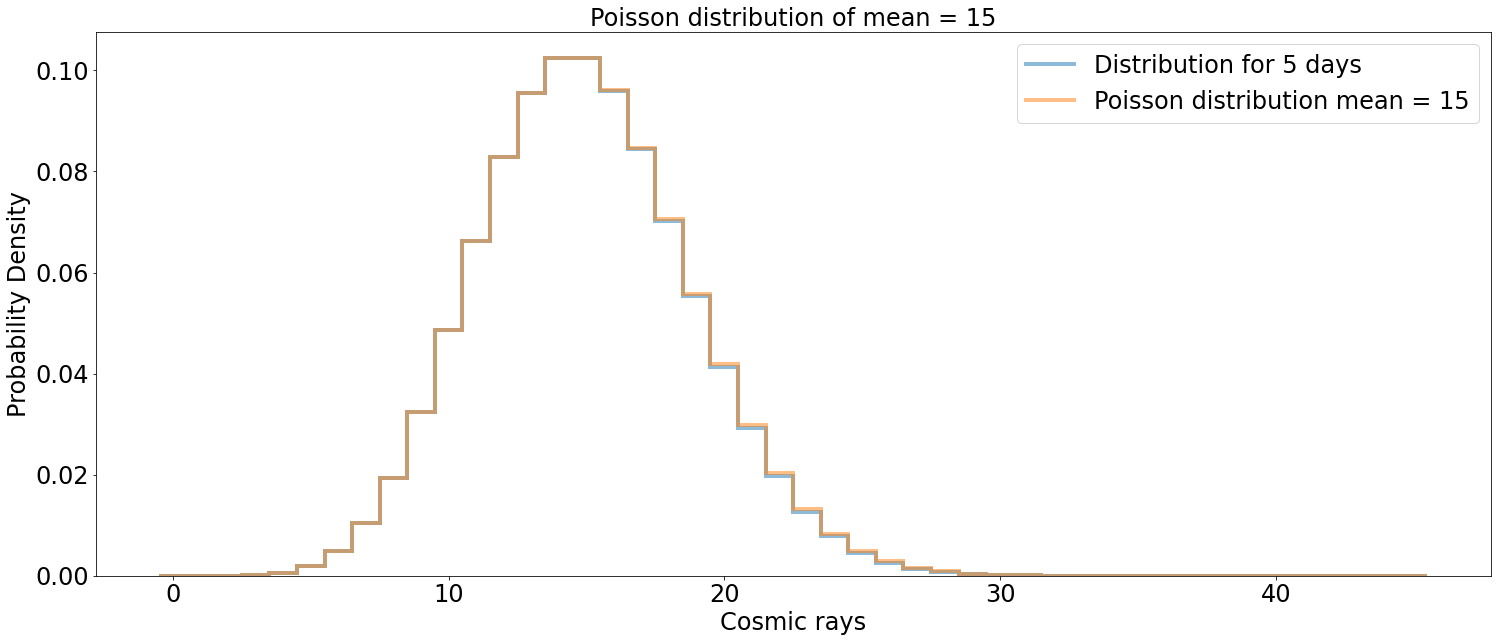

In [4]:
# Problem 1 part B


fig, ax = plt.subplots(1, 1)
ax.tick_params(labelsize = 24)

poisson_dist = stats.poisson.pmf(x, mu)
conv5 = stats.poisson.pmf(x, mu)

for i in range(4):
    conv5 = np.convolve(conv5, poisson_dist)
    
bins = np.arange(-0.5, len(conv5)+0.5)

poisson_dist_5 = stats.poisson.pmf(np.arange(0, len(conv5)), mu*5)

bins2 = np.arange(-0.5, len(conv5)+0.5)

ax.stairs(conv5, bins, linewidth = 4, alpha = 0.5, label = "Distribution for 5 days")
ax.stairs(poisson_dist_5, bins2, linewidth = 4, alpha = 0.5, label = "Poisson distribution mean = 15")


plt.xlabel("Cosmic rays", fontsize = 24)
plt.ylabel("Probability Density", fontsize = 24);
plt.title("Poisson distribution of mean = 15", fontsize = 24);
ax.legend(fontsize = 24)


The fact that these two distributions lie one on top of the other almost exactly is evidence that the poisson distribution added to another poisson distribution results in a poisson distribution with mean equal to the sum of the first two poisson distributions. The poisson distribution gives the likelihood of some number of events in a given interval given some average number of events per that interval. Adding two poisson distribution is like taking the average over an interval that is twice as long. For an interval that is 2 times longer the average number of counts is equal to two times the original average. 

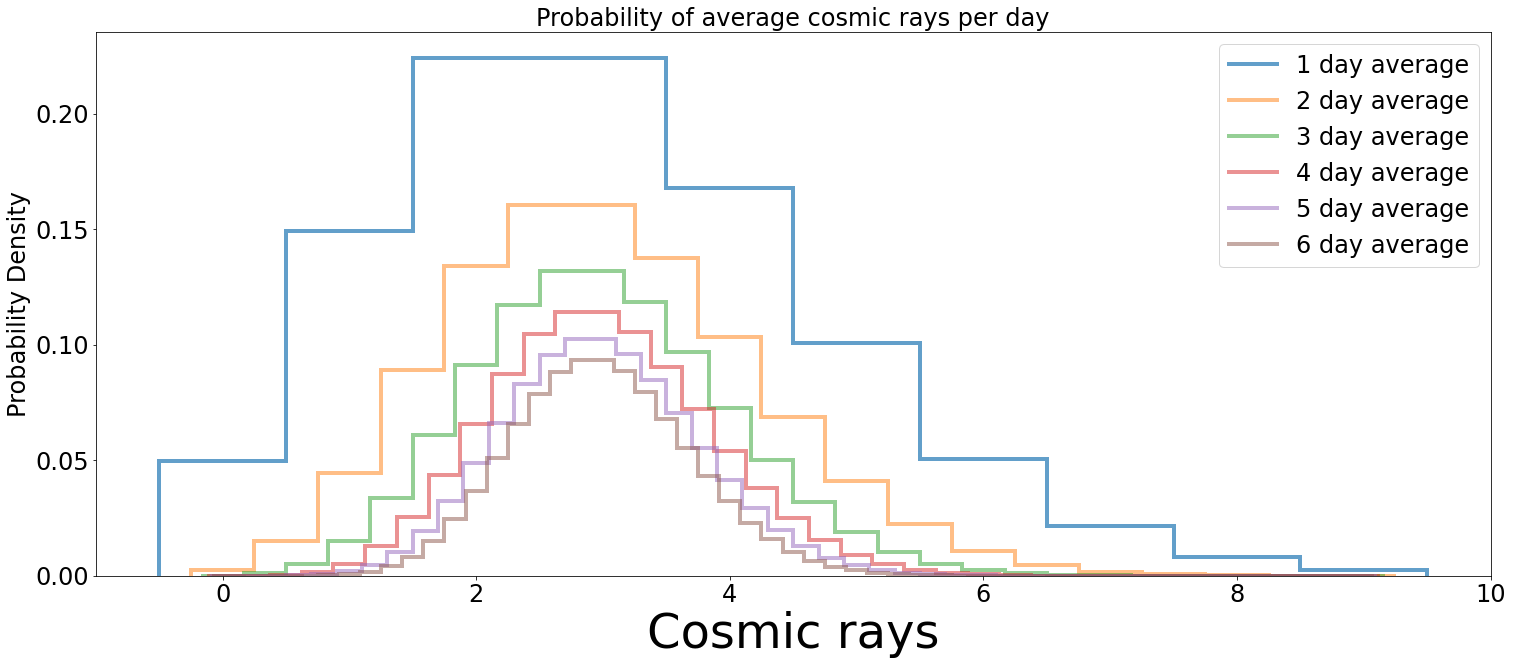

In [5]:
# Problem 1.C

plt.rcParams["figure.figsize"] = (25,10)
fig, ax = plt.subplots(1, 1)
ax.tick_params(labelsize = 24)


mu = 3
    
x = np.arange(stats.poisson.ppf(0.001, mu),
              stats.poisson.ppf(0.999, mu))

edges = np.arange(x[0]-0.5, x[-1]+1.5, 1)

ax.stairs(stats.poisson.pmf(x, mu), edges, linewidth = 4, alpha = 0.7, label = "1 day average")

poisson_dist = stats.poisson.pmf(x, mu)
conv = stats.poisson.pmf(x, mu)

for i in range(5):
    
    conv = np.convolve(conv, poisson_dist)
    x = np.arange(-0.5, len(conv)+0.5)
    ax.stairs(conv, x/(i+2), linewidth = 4, alpha = 0.5, label = str(i+2) + " day average")


plt.xlabel("Cosmic rays", fontsize = 48)
plt.ylabel("Probability Density", fontsize = 24);
plt.title("Probability of average cosmic rays per day", fontsize = 24);
plt.legend(fontsize = 24)


The mean of the average stays the same, and the scale of the x axis is changed. This is a reuslt of the fact that in part B, the x values had to be discrete, but now, we are talking about the likelihood of an average number of cosmic rays per days over some interval of days N. This means that these values can take on partial values which is obvious in the above plot becasue the bins for days greater than 1 do not fall over integers. Further more the higher the number of days that are averaged, the more narrow the distribution becomes. As a result the likelihood of measuring a value closer to the true mean incereases. 

Because it is discrete the total probability is still equal to one since the total probability is the sum of all of the bin heights

Part D) Pick some number of days N, and assume you saw Y*N gamma rays from your source. Calculate the 'sigma' of your observation. [In reality the number of gamma-rays seen from a source will also fluctuate, but we're going to ignore that complication for a couple of labs.]

In [6]:
"""
Choose N to be 10
Choose Y to be 6
Y * N = 60
"""
x = np.arange(stats.poisson.ppf(0.0001, mu),
              stats.poisson.ppf(0.9999, mu))


probability = stats.poisson.sf(60, mu * 10)

sigma = abs(stats.norm.ppf(probability))
print(sigma)

4.913001032619785


An observation of 60 gamma rays is nearly a 5 sigma event

### Problem 2  
A) My chosen distribution is an exponential distribution

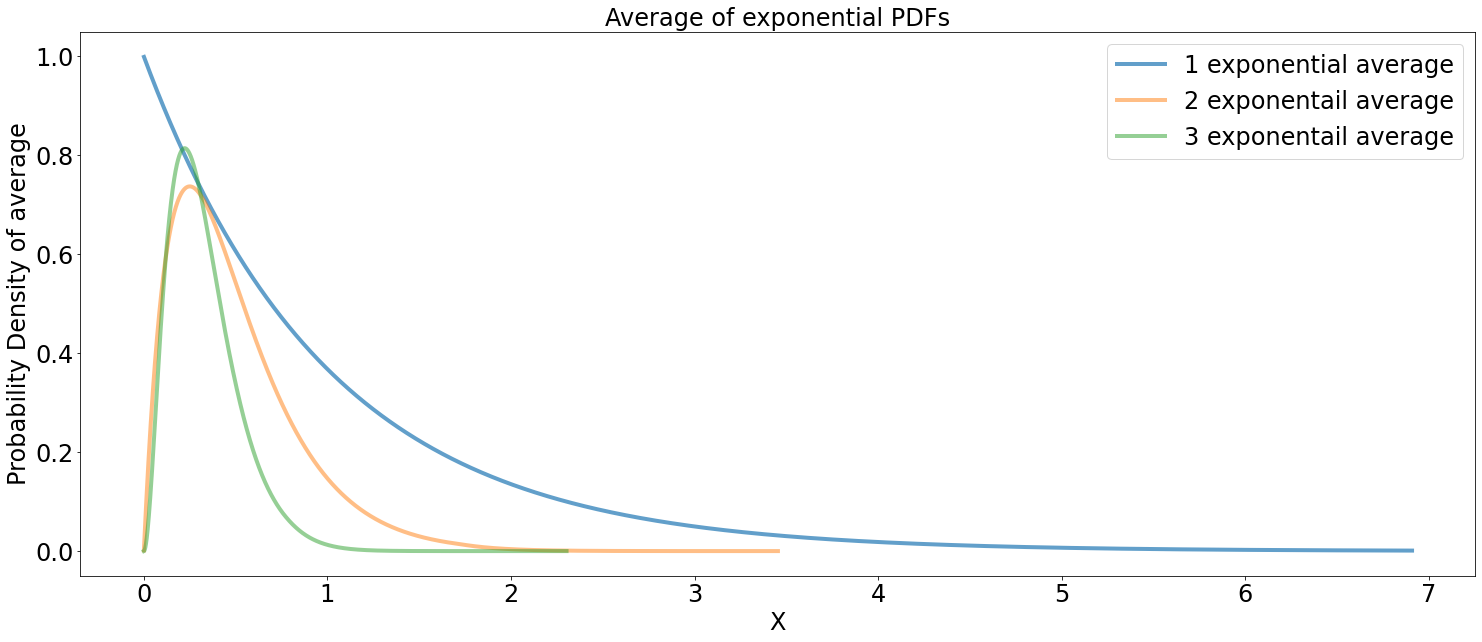

In [5]:
plt.rcParams["figure.figsize"] = (25,10)
fig, ax = plt.subplots(1, 1)
ax.tick_params(labelsize = 24)


mu = 0
lam = 1
x = np.linspace(stats.expon.ppf(0.001, mu),
              stats.expon.ppf(0.999, mu), 10000)
expo = stats.expon.pdf(x, mu, lam)
ax.plot(x, expo, linewidth = 4, alpha = 0.7, label = "1 exponential average")

expo_dist = stats.expon.pdf(x, mu, lam)
conv = stats.expon.pdf(x, mu, lam)

for i in range(2):
    
    conv = np.convolve(conv, expo_dist)
    x = np.linspace(stats.expon.ppf(0.001, mu),
                    stats.expon.ppf(0.999, mu),
                   len(conv))
    dx = x[1]-x[0]
    ax.plot(x/(i+2), conv/(dx*sum(conv)), linewidth = 4, alpha = 0.5, label = str(i+2) + " exponentail average")


plt.xlabel("X", fontsize = 24)
plt.ylabel("Probability Density of average", fontsize = 24);
plt.title("Average of exponential PDFs", fontsize = 24);
plt.legend(fontsize = 24)

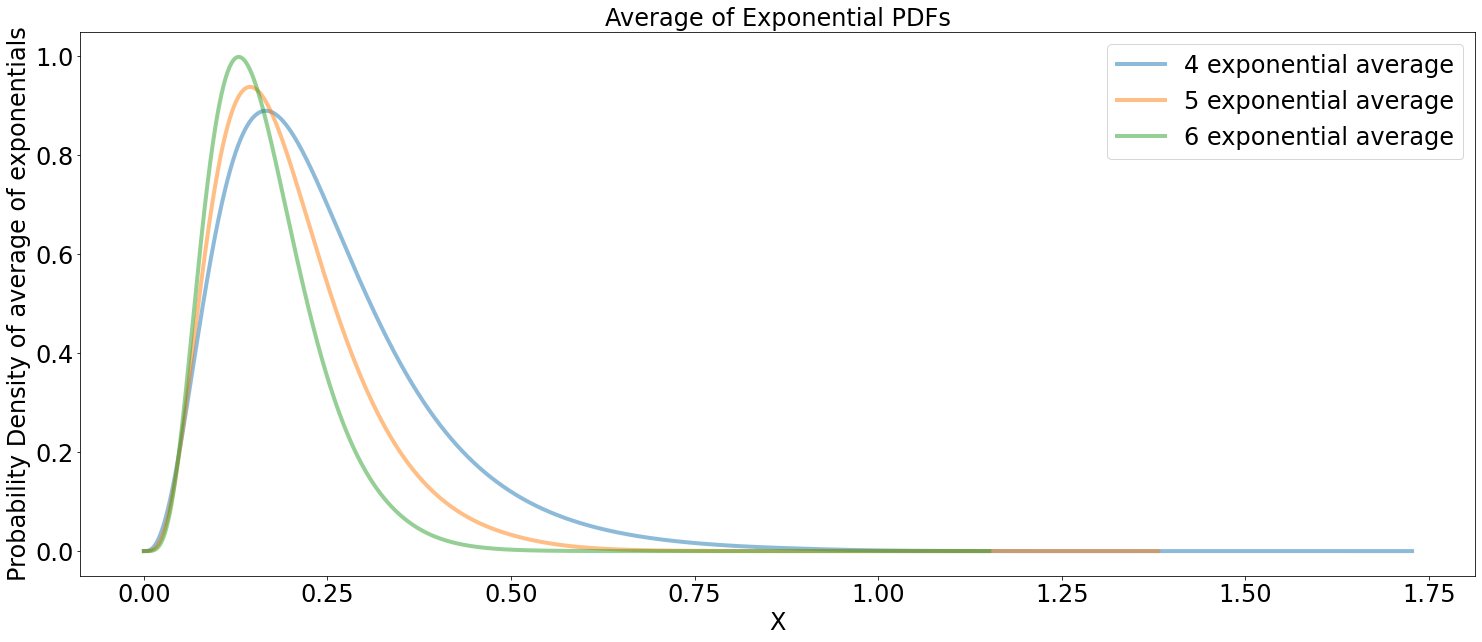

In [6]:
plt.rcParams["figure.figsize"] = (25,10)
fig, ax = plt.subplots(1, 1)
ax.tick_params(labelsize = 24)


mu = 0
lam = 1


expo_dist = stats.expon.pdf(x, mu, lam)

for i in range(3):
    
    conv = np.convolve(conv, expo_dist)
    x = np.linspace(stats.expon.ppf(0.001, mu),
                    stats.expon.ppf(0.999, mu),
                   len(conv))
    dx = x[1]-x[0]
    ax.plot(x/(i+4), conv/(dx*sum(conv)), linewidth = 4, alpha = 0.5, label = str(i+4) + " exponential average")


plt.xlabel("X", fontsize = 24)
plt.ylabel("Probability Density of average of exponentials", fontsize = 24);
plt.title("Average of Exponential PDFs", fontsize = 24);
plt.legend(fontsize = 24)

B) The first plot above shows the exponential function by itself as well as the first two averages. The second plot shows the 4th 5th and 6th averages. They are split on two plots since the x axis is squished so much for the last three plots. From these two plots it is clear that the exponential is approaching something that looks somwhat gaussian. However, it can be shown analytically that the convolution of two independent exponential functions with $\lambda_1 = \lambda_2$ is given by the function 
$$
f(z) = \lambda^{2}ze^{-\lambda z}
$$
which is not the same as a gaussian. And does not become a gaussian when convolved with another exponential function. From these averages it is obvious that N = 6 averages is not enough to approximate the average of exponential functions as a gaussian. So in order to approximate the exponential as a gaussian it is necessary that N > 6. That said, it may be possible to approximate the very top of the curve as gaussian, and this could be done if the values of the array storing the y values of the averages could be carfully chosen so that when the mean was taken it lied somewhere near the middle of the peak, and that could be used to overlay a gaussian distribution in order to compare how closely they matched, provided it was scaled correctly. 

### Problem 3
#### Version 1

In [11]:
# Width of gaussian X = 1.4
# Signal strength = 10

probability = stats.norm.sf(10, loc = 0, scale = 1.4)
print(probability)
sigma = abs(stats.norm.ppf(probability, loc = 0, scale = 1))
print("The significance of a signal of 10 for a single pixel is", sigma)
# Pretty Simple, Easy setup from previous labs

4.570530827193354e-13
The significance of a signal of 10 for a single pixel is 7.142857142857143


With a sigma equal to 7, this is a discovery level event. 

#### Version 2
B) Question:
If the background of a single pixel is given by a gaussian of 0 mean and standard deviation of 12, 
what is the probability that in 10,000 pixels, the background produces a signal of 33 or greater? 

The probability distribution is the same as that in version 1 of this problem, but the heights are multiplied by 10000. 

In [12]:
# Problem 3 version 2 part B
prob10k = stats.norm.sf(10, loc = 0, scale = 1.4)*10000
print("The probability of detecting a signal of 10 in a field of 10,000 pixels each with a background",
      "given by a gaussian distribution of mean = 0 and standard deviation = 1.4 is", prob10k)

The probability of detecting a signal of 10 in a field of 10,000 pixels each with a background given by a gaussian distribution of mean = 0 and standard deviation = 1.4 is 4.570530827193354e-09


In [13]:
# Problem 3 version 2 part C
sigma10k = abs(stats.norm.ppf(prob10k, loc = 0, scale = 1))
print("The significance of a signal of 10 in in a field of 10,000 pixels each with a background",
      "given by a gaussian distribution of mean = 0 and standard deviation = 1.4 is", sigma10k)

The significance of a signal of 10 in in a field of 10,000 pixels each with a background given by a gaussian distribution of mean = 0 and standard deviation = 1.4 is 5.745942040972376


### Problem 4

- Assume the same parameters as part 3) i.e. `loc = 0` and `scale = 1.4` and signal strength = 10


In [14]:
# 4.A: Signal required for 5 sigma event for a single pixel

prob5s = stats.norm.sf(5, loc = 0, scale = 1)
signal5s = abs(stats.norm.ppf(prob5s, loc = 0, scale = 1.4))
print("The signal required for a 5 sigma event for a single pixel is", signal5s)

The signal required for a 5 sigma event for a single pixel is 7.000000000000001


In [16]:
# 4.B: Signal required for a 5 sigma event for 10000 pixels

signal5s10K = abs(stats.norm.ppf(prob5s/10000, loc = 0, scale = 1.4))
print("The signal required for a 5 sigma event in a field of 10,000 pixels is", signal5s10K)

The signal required for a 5 sigma event in a field of 10,000 pixels is 9.170752657787467


C) The signal must be ~ 30% brighter in order to be considered a 5 sigma level event when the trials factor is 10,000. The low value of the sensitivity penalty due to the trials factor is the result of the fact that on the edges of the distribution the trials factor, even for large trials factors, only changes the likelihood by a relatively small amount since very little probability lies on the edges. This effect is illustrated in the semilog plot below. The height at the mean increases by near 1000 while the height near 5 sigma only increase by around 0.01

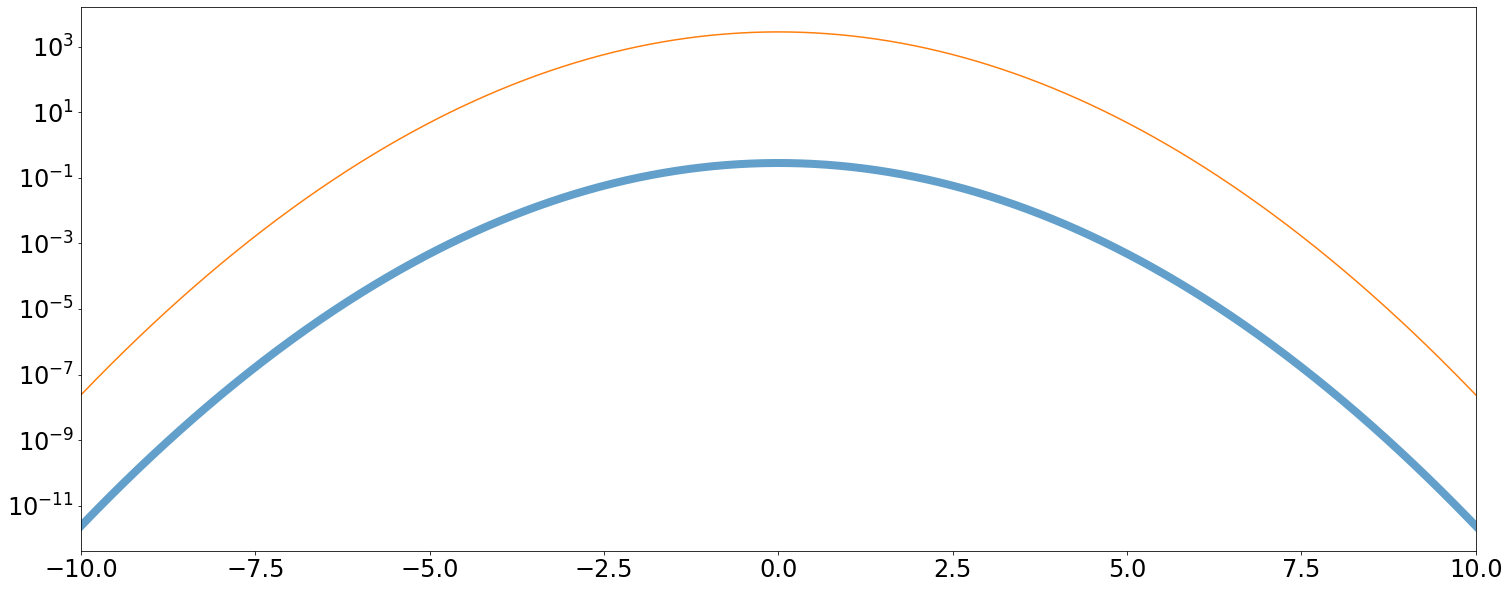

In [17]:
x = np.linspace(-10, 10, 1000)
mean = 0
stddv = 1.4
pdf = stats.norm.pdf(x, loc = mean, scale = stddv)
pdf10k = pdf*10000

fig, ax = plt.subplots(1, 1)
plt.tick_params(labelsize = 24)
plt.xlim([-10,10])
plt.yscale('log')
ax.plot(x, pdf, linewidth = 8, alpha = 0.7)
ax.plot(x, pdf10k)


In [18]:
# Problem 4.D

factors = [1e5, 1e7, 1e10, 1e12]

for i in factors: 
    signal5s10K = abs(stats.norm.ppf(prob5s/i, loc = 0, scale = 1.4))
    print("The signal required for a 5 sigma event in a field of", i, " pixels is", signal5s10K)

The signal required for a 5 sigma event in a field of 100000.0  pixels is 9.640583006736145
The signal required for a 5 sigma event in a field of 10000000.0  pixels is 10.51965517204709
The signal required for a 5 sigma event in a field of 10000000000.0  pixels is 11.718826406935891
The signal required for a 5 sigma event in a field of 1000000000000.0  pixels is 12.455925174077722


Changing the trials factor by 7 orders of magnitude only increased the detection sensitivity threshold by ~ 30%. 